In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [19]:
#Non-dim numbers
Weber = 10.;
Reynolds = 10.;
gamma2 = 1.4;

Mach = 0.1;    #Doesn't matter as the liquid is incompressible in RP
gamma1 = 5.5;  #Doesn't matter as the liquid is incompressible in RP
mu1_by_mu2 = 100; #doesn;t matter as mu2 is 0 in RP
rho1_by_rho2 = 1000; 

pr = 9; #Ratio of applied pressure p_inf to p0


#scales
#U0 = np.sqrt(pa*p0/rho);
#X0 = R_0
#T0 = 

#System parameters determined from Non-dimensional numbers
R_0 = 1;
rho = 1;
mu  = 1./Reynolds;
sigma = 1./Weber;

U_0 = 0.;

#Ambient pressure
p0 = 1./9.;
#pa(t), Applied Pressure (is a constant)
pa = p0*(1+pr);

#Polytropic coeff
gamma=gamma2

In [20]:
#Initsial gas pressure
p_g0 = p0 + 2*sigma/R_0

In [27]:
#pressure at infty as a function of time
def p_infty (t):
    return pa
#pressure of gas as a function of R
def p_gas(R):
    p_g = p_g0*np.power(R_0/R, 3*gamma);
    return p_g

In [28]:
#d/dt (x) = equation(x,t)
def RP(x, t):
    (R,u) = x;
    udot = (p_gas(R)-p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)

In [32]:
#solving ODE
tend = 0.915*3.5;
u_0 = 0.;

time = np.arange(0, tend, 0.00025)

In [33]:
#Solving By Rp
R_1 = odeint(RP, [R_0, u_0], time)
#plot
V = R_1[:,1]
R = R_1[:,0]
mtimes = time/0.915

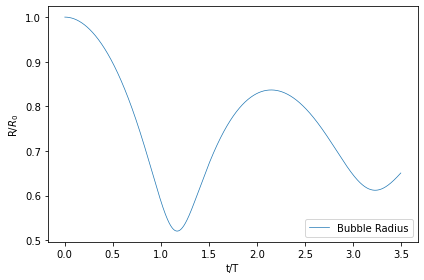

In [34]:
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("R/$R_0$")
ax1.plot(mtimes, R, linewidth = 0.7, label = "Bubble Radius")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [35]:
def dpinfty_dt(t):
    return 0;

u0 = np.sqrt((pa-p0)/rho);
c0 = u0/Mach;
#Keller - Miksis
def KM(x, t):
    (R,u) = x; 
    p_L = p_gas(R) - 2*sigma/R - 4*mu*u/R; #p_l(r,t) at r=R
    dpL_dt_res = -3*gamma*p_gas(R)*u/R  +  2*sigma*u/R  +  4*mu*u**2/R**2; #dpl_dt_res = dpL_dt - (-4*mu*udot/R)
    udot = ( (1+u/C0)*(p_L-p_infty(t))/rho + R*(dpL_dt_res - dpinfty_dt(t))/(rho*C0) - 1.5*(1-u/3/C0)*u**2 )/ (1-u/C0 + 4*mu/(C0*rho*R))/R;
    return (u, udot)

In [39]:
#Solving By Rp
R_2 = odeint(RP, [R_0, u_0], time)
#plot
Vk = R_2[:,1]
Rk = R_2[:,0]
mtimes = time/0.915

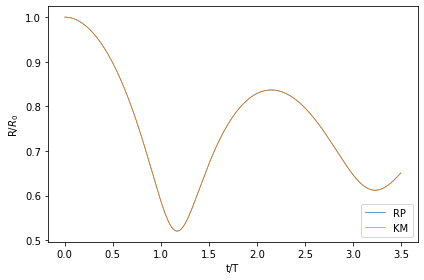

In [41]:
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("R/$R_0$")
ax1.plot(mtimes, R, linewidth = 0.7, label = "RP")
ax1.plot(mtimes, Rk, linewidth = 0.7, label = "KM")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [57]:
arr = np.column_stack((mtimes, R, V))
np.savetxt("RP.txt", arr, fmt="%s")

In [58]:
np.shape(arr)

(12810, 3)